In [19]:
# Step 1: Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import cv2


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of unique labels: 10


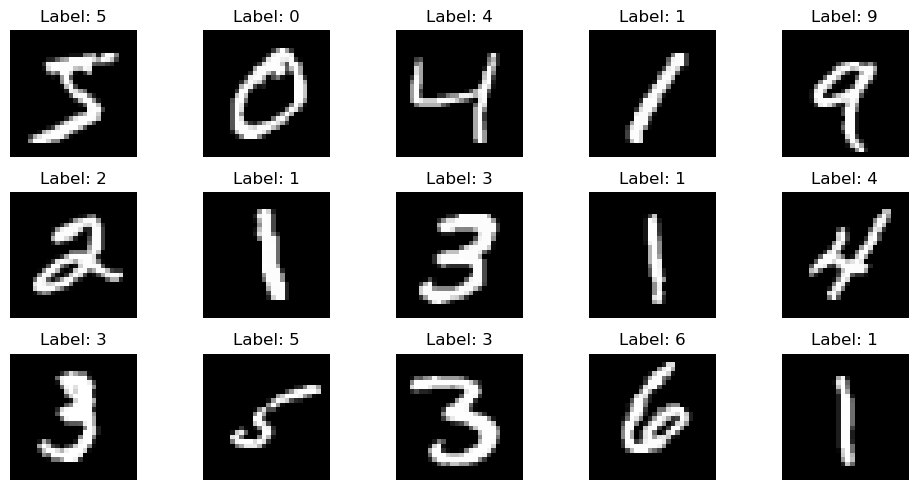

In [21]:
# Step 2: Load MNIST Data

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape of dataset
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Number of classes
print("Number of unique labels:", len(np.unique(y_train)))

# Visualize some sample digits
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [23]:
# Step 3A: Preprocess the Data

# Normalize pixel values (0-1 range)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to add channel dimension (needed for CNN: 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("After preprocessing:")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


After preprocessing:
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [25]:
# Step 3B: Build CNN Model (Function for neatness)

def build_cnn_model(optimizer='adam', learning_rate=0.001):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
## Train CNN Model + Plot Accuracy/Loss Graphs

In [27]:
# Step 4A: Train the CNN Model

# Build model with Adam optimizer
model_adam = build_cnn_model(optimizer='adam', learning_rate=0.001)

# Train the model
history_adam = model_adam.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=100,
    verbose=2
)


Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


480/480 - 6s - 12ms/step - accuracy: 0.9360 - loss: 0.2165 - val_accuracy: 0.9760 - val_loss: 0.0772
Epoch 2/15
480/480 - 6s - 12ms/step - accuracy: 0.9813 - loss: 0.0606 - val_accuracy: 0.9837 - val_loss: 0.0538
Epoch 3/15
480/480 - 6s - 12ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9859 - val_loss: 0.0491
Epoch 4/15
480/480 - 6s - 12ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 5/15
480/480 - 6s - 13ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9886 - val_loss: 0.0402
Epoch 6/15
480/480 - 6s - 13ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9868 - val_loss: 0.0457
Epoch 7/15
480/480 - 6s - 13ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9905 - val_loss: 0.0353
Epoch 8/15
480/480 - 6s - 13ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9901 - val_loss: 0.0397
Epoch 9/15
480/480 - 6s - 14ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9903 - val_loss: 0.0393
Epo

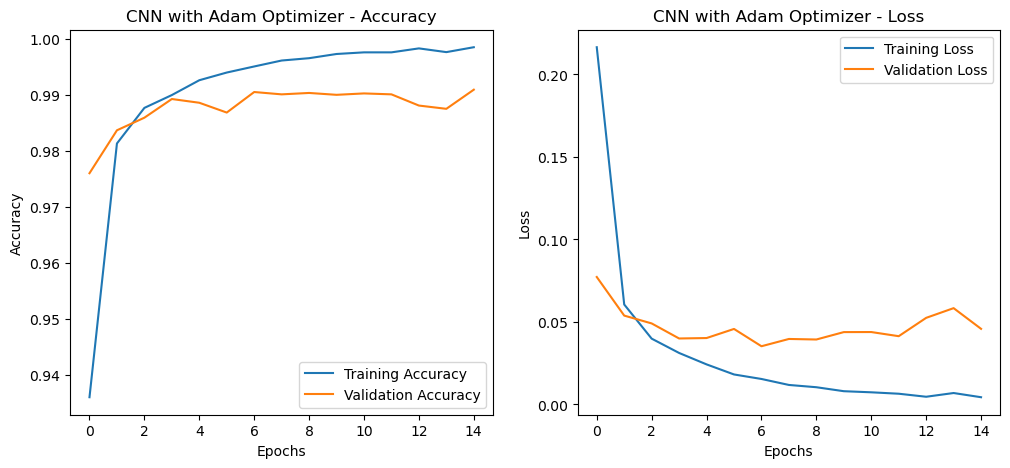

In [29]:
# Step 4B: Plot Training vs Validation Accuracy and Loss

def plot_training_curves(history, title='Model'):
    plt.figure(figsize=(12,5))
    
    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Now plot for Adam optimizer model
plot_training_curves(history_adam, title='CNN with Adam Optimizer')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


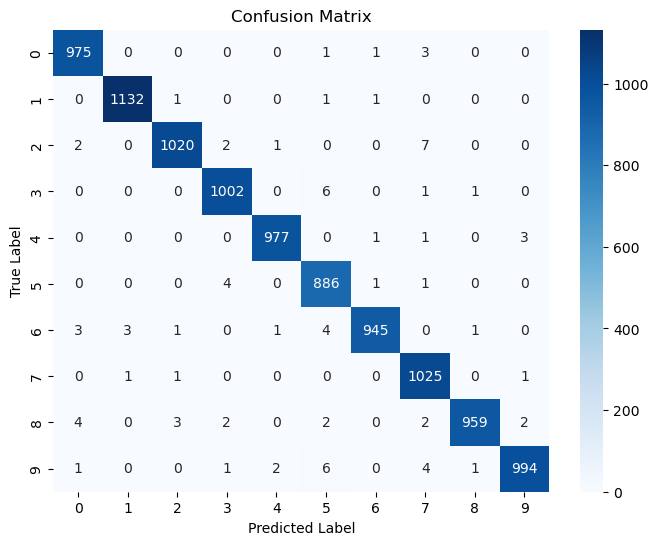


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
# Step 5: Evaluate the trained CNN Model

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    # Predict probabilities
    y_pred_probs = model.predict(X_test)
    
    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Now evaluate the model you trained (Adam optimizer model)
evaluate_model(model_adam, X_test, y_test)


In [33]:
# Step 6A: Build and Train another CNN Model using SGD Optimizer

# Build model with SGD optimizer
model_sgd = build_cnn_model(optimizer='sgd', learning_rate=0.01)

# Train the model
history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=100,
    verbose=2
)


Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


480/480 - 6s - 13ms/step - accuracy: 0.6270 - loss: 1.3163 - val_accuracy: 0.8922 - val_loss: 0.3876
Epoch 2/15
480/480 - 6s - 12ms/step - accuracy: 0.8965 - loss: 0.3466 - val_accuracy: 0.9262 - val_loss: 0.2471
Epoch 3/15
480/480 - 6s - 12ms/step - accuracy: 0.9246 - loss: 0.2502 - val_accuracy: 0.9442 - val_loss: 0.1950
Epoch 4/15
480/480 - 6s - 13ms/step - accuracy: 0.9394 - loss: 0.1976 - val_accuracy: 0.9532 - val_loss: 0.1628
Epoch 5/15
480/480 - 6s - 12ms/step - accuracy: 0.9525 - loss: 0.1591 - val_accuracy: 0.9607 - val_loss: 0.1396
Epoch 6/15
480/480 - 6s - 12ms/step - accuracy: 0.9592 - loss: 0.1363 - val_accuracy: 0.9668 - val_loss: 0.1208
Epoch 7/15
480/480 - 6s - 12ms/step - accuracy: 0.9639 - loss: 0.1194 - val_accuracy: 0.9668 - val_loss: 0.1138
Epoch 8/15
480/480 - 6s - 12ms/step - accuracy: 0.9681 - loss: 0.1058 - val_accuracy: 0.9722 - val_loss: 0.0991
Epoch 9/15
480/480 - 6s - 12ms/step - accuracy: 0.9716 - loss: 0.0956 - val_accuracy: 0.9732 - val_loss: 0.0951
Epo

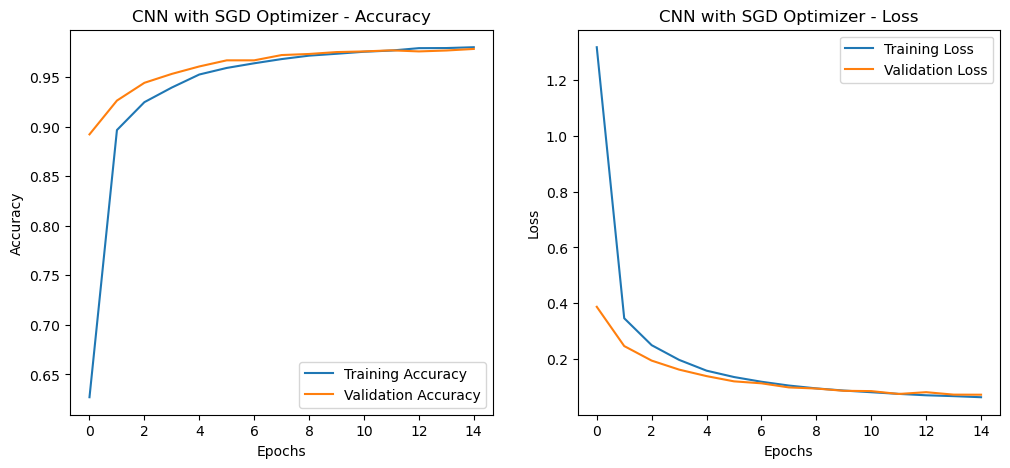

In [35]:
# Step 6B: Plot Training vs Validation Accuracy and Loss for SGD Model

plot_training_curves(history_sgd, title='CNN with SGD Optimizer')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


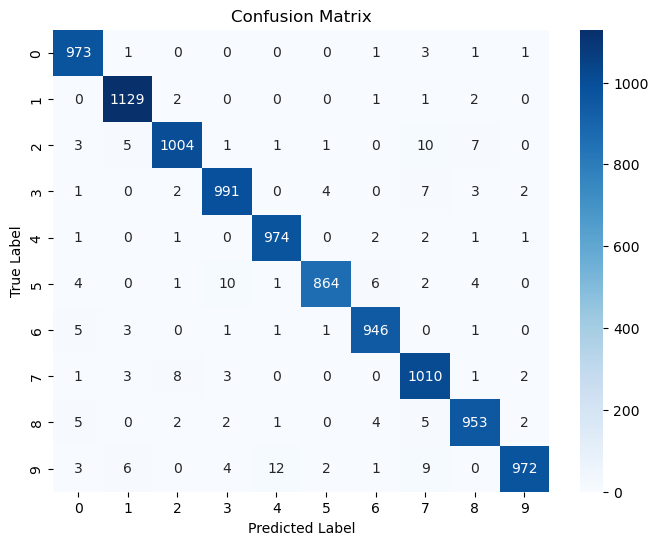


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [37]:
# Step 6C: Evaluate the SGD Optimizer Model

evaluate_model(model_sgd, X_test, y_test)


In [39]:
# Step 7: Predict a Single Digit Image using the trained model

import cv2

def predict_single_digit(image_path, model):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize to 28x28
    img = cv2.resize(img, (28, 28))
    
    # Invert colors if needed
    img = 255 - img

    # Normalize pixel values
    img = img.astype('float32') / 255.0
    
    # Reshape to model input shape (1,28,28,1)
    img = img.reshape(1, 28, 28, 1)
    
    # Predict
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    
    # Show image and prediction
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()
    
    return predicted_digit



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


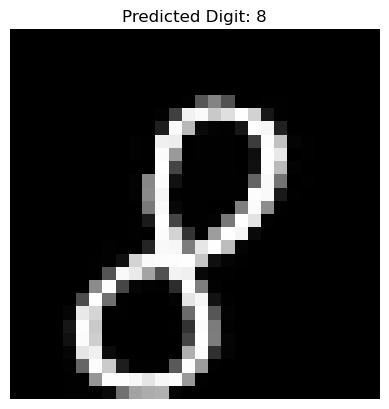

Predicted Digit: 8


In [41]:
# Give the path of your custom digit image
image_path = '/Users/manoharshasappa/Desktop/Files/3 Sem/AIT 736 NLP/Final_Project/Screenshot 2025-04-26 at 11.13.57 AM.png'

# Predict using Adam model
predicted_digit = predict_single_digit(image_path, model_adam)
print(f"Predicted Digit: {predicted_digit}")
